 # IPO Hype vs Market Reality: A Data Story of Listed IPOs in India (Analysis)

# Project Description:

IPOs arrive with noise. Headlines shout over-subscription. Grey markets whisper promises. Investors are told how “oversubscribed” an issue was, but far less about whether that demand translated into meaningful post-listing outcomes.

The problem is not lack of data.
The problem is misplaced emphasis.

## Problem Statement:

Despite widespread focus on IPO subscription figures, `it remains unclear how reliably these metrics translate into listing-day and early post-listing performance.` This project examines recently listed IPOs in India to evaluate whether subscription levels meaningfully explain listing performance, and whether SME and Mainline IPOs follow fundamentally different market dynamics.

## Objective:

1) To evaluate whether pre-listing demand signals (subscription levels, issue size, pricing) meaningfully explain listing-day and early post-listing performance, and 
2) how this relationship differs between SME and Mainline IPOs.

## Secondary Objective:
1) Understand listing-day price dynamics (open → close)
2) Identify patterns of hype, correction, and sustainability
3) Provide decision-relevant insights for retail investors

**This notebook asks calmer questions:**
##### 1) `Does IPO subscription meaningfully predict listing performance?`
Is higher subscription associated with higher listing gains, or is the relationship weaker than popularly assumed?

    `Sub-questions:`
    a. Is the relationship linear?
    b. Do extremely high subscriptions outperform moderate ones?
    c. Does subscription predict:
        i. Gap-up opening?
        ii. End-of-day performance?
    d. Are there diminishing returns to hype?
    
##### 2) `Do SME and Mainline IPOs behave differently enough to require separate evaluation logic?`
Do SME IPOs exhibit structurally different listing-day behavior compared to Mainline IPOs?

      `Sub-questions:`
      a. Which category shows higher average listing gains?
      b. Which shows greater volatility?
      c. Do SME IPOs exhibit sharper open-to-close corrections?
      d. Is subscription interpreted differently by the market across the two segments?

**Data Source:**
- To answer that, we begin where retail curiosity often starts: Moneycontrol’s listed IPOs table. The data used here is publicly available and aggregated. We are not scraping behind logins or paywalls. The goal is not speed, but repeatability.
- This analysis focuses on recent IPO behavior, not exhaustive history.
- Dataset refreshed on every execution to reflect the latest available IPOs.
- Each run is timestamped to ensure data freshness and reproducibility
- The analysis is designed to support insight-driven decision-making rather than provide buy or sell recommendations.

**Note:**

Some IPOs in the dataset are recent or not yet fully listed, resulting in missing values for listing-related fields. These are retained intentionally, as they reflect different stages in the IPO lifecycle rather than data quality issues.

## Data Scope & Assumptions

1) Focuses on recently listed IPOs due to data availability constraints

2) Analyzes subscription levels, issue size, pricing, and listing-day performance

3) Examines structural differences between SME and Mainline IPOs

4) Emphasizes behavioral and descriptive analysis, not forecasting

5) Retains missing values where data is not yet applicable (e.g., IPOs not yet listed)

## Data Collection Note & Limitation

- The Listed IPO data was sourced from Moneycontrol, which renders records using client-side virtualization and infinite scroll.
- Due to this implementation, only a fixed subset of rows is present in the DOM at any given time, making static HTML extraction and full historical capture infeasible without intrusive browser instrumentation.
- For this analysis, the dataset is intentionally limited to the most recently listed IPOs that are directly observable on initial load. This constraint does not affect the analytical objective, which focuses on understanding relationships between subscription levels, pricing, and listing performance rather than exhaustive historical coverage.

### Importing necessary Libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

### Loading and reading the dataset

In [2]:
URL = "https://www.moneycontrol.com/ipo/listed-ipos/?classic=true"

def load_latest_listed_ipos():
    df = pd.read_html(URL)[0]
    df["data_fetched_at"] = datetime.now()
    return df

df_raw = load_latest_listed_ipos()
df_raw

,Company Name,Unnamed: 1,Listing Date,Issue Price,Total Subs,Listing Open (₹),Listing Close (₹),Listing Gain,LTP (₹),As of Todays Gain,Issue Size,data_fetched_at
0,Modern Diagnostic & Research Centre IPO,SME,07 Jan 26,₹ 90,350.49x,-,-,-,₹ 94.00,-,36.89 Cr,2026-01-09 15:38:19.098611
1,E to E Transportation Infrastructure IPO,SME,02 Jan 26,₹ 174,490.57x,330.6,327.8,90.00%,₹ 304.00,-8.05%,84.22 Cr,2026-01-09 15:38:19.098611
2,Apollo Techno Industries IPO,SME,31 Dec 25,₹ 130,47.15x,-,-,-,₹ 131.90,-,47.96 Cr,2026-01-09 15:38:19.098611
3,Bai-Kakaji Polymers IPO,SME,31 Dec 25,₹ 186,5.38x,-,-,-,₹ 180.50,-,105.17 Cr,2026-01-09 15:38:19.098611
4,Admach Systems IPO,SME,31 Dec 25,₹ 239,3.95x,-,-,-,₹ 225.65,-,42.60 Cr,2026-01-09 15:38:19.098611
5,Nanta Tech IPO,SME,31 Dec 25,₹ 220,6x,-,-,-,₹ 303.50,-,31.81 Cr,2026-01-09 15:38:19.098611
6,Dhara Rail Projects IPO,SME,31 Dec 25,₹ 126,103.99x,150,157.5,19.05%,₹ 129.35,-13.77%,50.20 Cr,2026-01-09 15:38:19.098611
7,Gujarat Kidney and Super Speciality IPO,Mainline,30 Dec 25,₹ 114,5.21x,120,104.54,5.26%,₹ 102.17,-14.86%,250.80 Cr,2026-01-09 15:38:19.098611
8,Shyam Dhani Industries IPO,SME,30 Dec 25,₹ 70,918.12x,133,139.65,90.00%,₹ 99.65,-25.08%,38.49 Cr,2026-01-09 15:38:19.098611
9,EPW India IPO,SME,30 Dec 25,₹ 97,1.29x,111,116.55,14.43%,₹ 117.65,5.99%,31.81 Cr,2026-01-09 15:38:19.098611


**The dataset is refreshed on every execution by re-fetching the live source, ensuring the analysis reflects the most recently listed IPOs available at runtime.**

- Real-world data rarely arrives politely.
- Column names shift.
- Empty headers sneak in.

- Before analysis, we listen to the data instead of forcing it.

## Section 1: Data Quality & Structure Assessment

### Inspecting columns

In [3]:
df_raw.columns.tolist()

['Company Name',
 'Unnamed: 1',
 'Listing Date',
 'Issue Price',
 'Total Subs',
 'Listing Open (₹)',
 'Listing Close (₹)',
 'Listing Gain',
 'LTP (₹)',
 'As of Todays Gain',
 'Issue Size',
 'data_fetched_at']

### Renaming with Intent
- Rather than hard-coding fragile column names, we map meanings to a clean schema.

- This makes the pipeline resilient and readable.

In [5]:
# Renmaing Columns 
df = df_raw.rename(columns=
               { "Company Name": "IPO Name", 
                "Unnamed: 1": "IPO Type", 
                "Listing Date": "Date", 
                "Issue Price": "Issue Price", 
                "Total Subs": "Subscription Total", 
                "Listing Open (₹)": "Listing Open Price", 
                "Listing Close (₹)": "Listing Close Price", 
                "Listing Gain": "Listing Gains Percent", 
                "LTP (₹)": "LTP", 
                "As of Todays Gain": "Todays Gain Percent", 
                "Issue Size": "Issue Size" })

In [6]:
df.head()

,IPO Name,IPO Type,Date,Issue Price,Subscription Total,Listing Open Price,Listing Close Price,Listing Gains Percent,LTP,Todays Gain Percent,Issue Size,data_fetched_at
0,Modern Diagnostic & Research Centre IPO,SME,07 Jan 26,₹ 90,350.49x,-,-,-,₹ 94.00,-,36.89 Cr,2026-01-09 15:38:19.098611
1,E to E Transportation Infrastructure IPO,SME,02 Jan 26,₹ 174,490.57x,330.6,327.8,90.00%,₹ 304.00,-8.05%,84.22 Cr,2026-01-09 15:38:19.098611
2,Apollo Techno Industries IPO,SME,31 Dec 25,₹ 130,47.15x,-,-,-,₹ 131.90,-,47.96 Cr,2026-01-09 15:38:19.098611
3,Bai-Kakaji Polymers IPO,SME,31 Dec 25,₹ 186,5.38x,-,-,-,₹ 180.50,-,105.17 Cr,2026-01-09 15:38:19.098611
4,Admach Systems IPO,SME,31 Dec 25,₹ 239,3.95x,-,-,-,₹ 225.65,-,42.60 Cr,2026-01-09 15:38:19.098611


### Checking the basic information of the dataset for a clear understanding of the analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   IPO Name               20 non-null     object        
 1   IPO Type               20 non-null     object        
 2   Date                   20 non-null     object        
 3   Issue Price            20 non-null     object        
 4   Subscription Total     20 non-null     object        
 5   Listing Open Price     20 non-null     object        
 6   Listing Close Price    20 non-null     object        
 7   Listing Gains Percent  20 non-null     object        
 8   LTP                    20 non-null     object        
 9   Todays Gain Percent    20 non-null     object        
 10  Issue Size             20 non-null     object        
 11  data_fetched_at        20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 2.0+ KB


- This output is exactly what I expected at this stage, and it tells a clear story.

- Right now, your DataFrame is in its raw narrative form. Everything is still text. Pandas is politely saying: `“I don’t trust these numbers yet.”`

- That’s not a bug. That’s honesty.

Let’s turn this into analysis-ready truth.

### Converting datatypes to relevant data types 

##### Converting Date column

In [8]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

##### Clean and convert numeric columns

In [9]:
numeric_cols = [
    "Issue Price",
    "Subscription Total",
    "Listing Open Price",
    "Listing Close Price",
    "Listing Gains Percent",
    "LTP",
    "Todays Gain Percent",
    "Issue Size"
]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^\d.\-]", "", regex=True)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


##### Optimize categorical meaning

In [10]:
df["IPO Type"] = (
    df["IPO Type"]
    .astype(str)
    .str.strip()
    .str.upper()
    .astype("category")
)

##### Verify the transformation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   IPO Name               20 non-null     object        
 1   IPO Type               20 non-null     category      
 2   Date                   20 non-null     datetime64[ns]
 3   Issue Price            20 non-null     int64         
 4   Subscription Total     20 non-null     float64       
 5   Listing Open Price     10 non-null     float64       
 6   Listing Close Price    10 non-null     float64       
 7   Listing Gains Percent  10 non-null     float64       
 8   LTP                    19 non-null     float64       
 9   Todays Gain Percent    10 non-null     float64       
 10  Issue Size             20 non-null     float64       
 11  data_fetched_at        20 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(7), int64(1), object(1)

In [12]:
df.head()

,IPO Name,IPO Type,Date,Issue Price,Subscription Total,Listing Open Price,Listing Close Price,Listing Gains Percent,LTP,Todays Gain Percent,Issue Size,data_fetched_at
0,Modern Diagnostic & Research Centre IPO,SME,2026-01-07,90,350.49,NaN,NaN,NaN,94.00,NaN,36.89,2026-01-09 15:38:19.098611
1,E to E Transportation Infrastructure IPO,SME,2026-01-02,174,490.57,330.6,327.8,90.0,304.00,-8.05,84.22,2026-01-09 15:38:19.098611
2,Apollo Techno Industries IPO,SME,2025-12-31,130,47.15,NaN,NaN,NaN,131.90,NaN,47.96,2026-01-09 15:38:19.098611
3,Bai-Kakaji Polymers IPO,SME,2025-12-31,186,5.38,NaN,NaN,NaN,180.50,NaN,105.17,2026-01-09 15:38:19.098611
4,Admach Systems IPO,SME,2025-12-31,239,3.95,NaN,NaN,NaN,225.65,NaN,42.60,2026-01-09 15:38:19.098611


## Section 2: Exploratory Data Analysis (EDA)

**1) Missing Values Analysis**

In [13]:
df.isna().sum()

IPO Name                  0
IPO Type                  0
Date                      0
Issue Price               0
Subscription Total        0
Listing Open Price       10
Listing Close Price      10
Listing Gains Percent    10
LTP                       1
Todays Gain Percent      10
Issue Size                0
data_fetched_at           0
dtype: int64

#### Interpretation: 

- Missing values are concentrated in listing-related fields such as:

    a) Listing Open Price,
    b) Listing Close Price,
    c) Listing Gains Percent,
    d) LTP,
    e) Today’s Gain Percent.

These missing values correspond to IPOs that are recent or not yet listed, rather than data extraction issues.

- Core descriptive fields (IPO Name, Issue Size, Subscription, Issue Price) are complete.

**Decision:** Missing values are retained intentionally, as they reflect different IPO lifecycle stages.

**2) Duplicate Records Check:**

In [14]:
df.duplicated().sum()

0

**Interpretation:**

- No duplicate IPO records are present in the dataset.
- Each row uniquely represents a single IPO.

**Decision:**
No deduplication is required.

**3) Outlier Detection:**

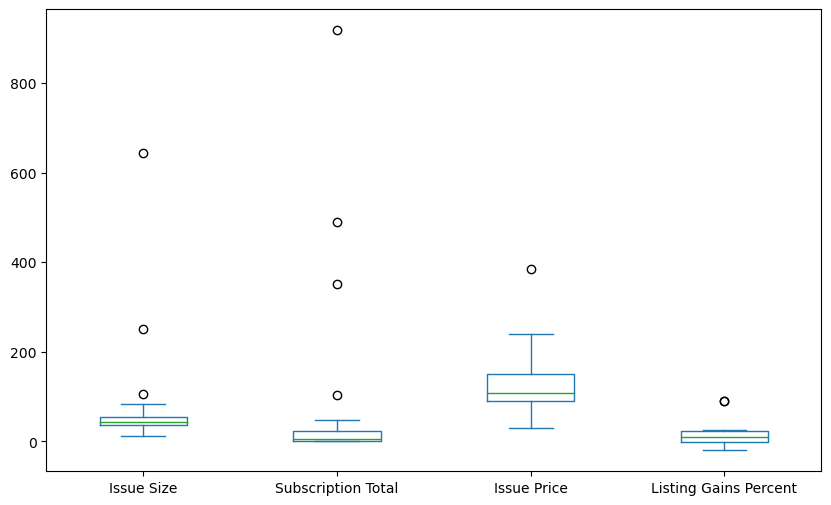

In [18]:
numeric_cols = [
    "Issue Size",
    "Subscription Total",
    "Issue Price",
    "Listing Gains Percent"
]

# Boxplot view:
df[numeric_cols].plot(kind="box", figsize=(10,6))
plt.show()

**Interpretation:**

- Several extreme values are observed, particularly in Subscription Total and Listing Gains Percent.
- These outliers represent genuine market phenomena rather than data errors.

**Decision:** Outliers are preserved, as removing them would eliminate meaningful signals of investor behavior.

**4) Statistical Summary:**

In [19]:
df[numeric_cols].describe()

,Issue Size,Subscription Total,Issue Price,Listing Gains Percent
count,20.000000,20.000000,20.000000,10.00000
mean,86.094500,98.903500,133.650000,20.36100
std,140.632852,232.200318,78.002885,39.58648
min,12.280000,0.590000,30.000000,-20.00000
25%,35.730000,1.562500,89.500000,-1.85750
50%,42.595000,5.295000,108.000000,9.84500
75%,55.400000,22.460000,150.000000,23.51250
max,644.450000,918.120000,384.000000,90.00000


**Interpretation:**

- Mean values are influenced by extreme observations.
- Median and interquartile ranges provide more stable summaries.
- Distributional skewness reinforces the need for:
    - Log-scaled visuals
    - Segmented analysis (SME vs Mainline)

**EDA Summary:**

The dataset is structurally sound, free of duplicate records, and contains missing values only where market activity has not yet occurred.
Outliers reflect real market dynamics rather than anomalies, reinforcing the need for careful interpretation rather than aggressive cleaning.

## Section 3: From EDA to Insight (Data Visualization - Analysis - Interpretation)

**1) Does IPO subscription meaningfully predict listing performance?**

This is the most common heuristic used by retail investors. We start by testing whether it holds up to scrutiny.

#### 3.1 Subscription vs Listing Gains (First Look)

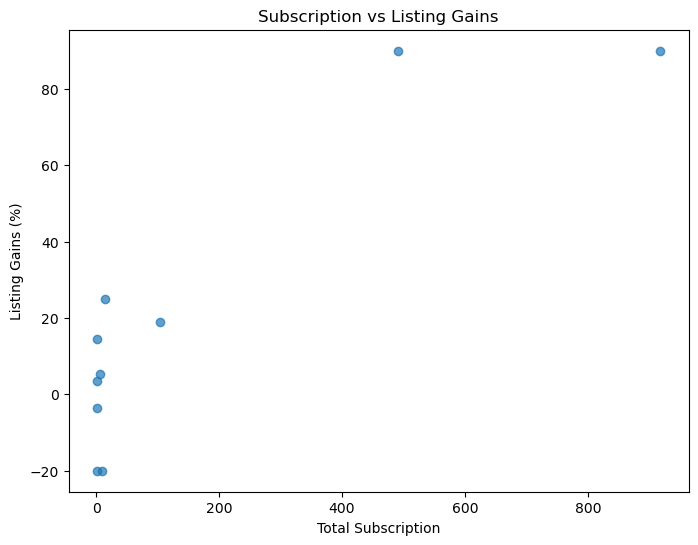

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["Subscription Total"],
    df["Listing Gains Percent"],
    alpha=0.7
)

plt.xlabel("Total Subscription")
plt.ylabel("Listing Gains (%)")
plt.title("Subscription vs Listing Gains")
plt.show()

**Interpretation:**
- A wide dispersion is immediately visible
- High subscription does not consistently lead to high listing gains
- Several highly subscribed IPOs deliver modest or even poor listing returns

**Initial insight:** Subscription appears to be a noisy signal rather than a reliable predictor.

#### 3.2 Handling Scale: Log Transformation

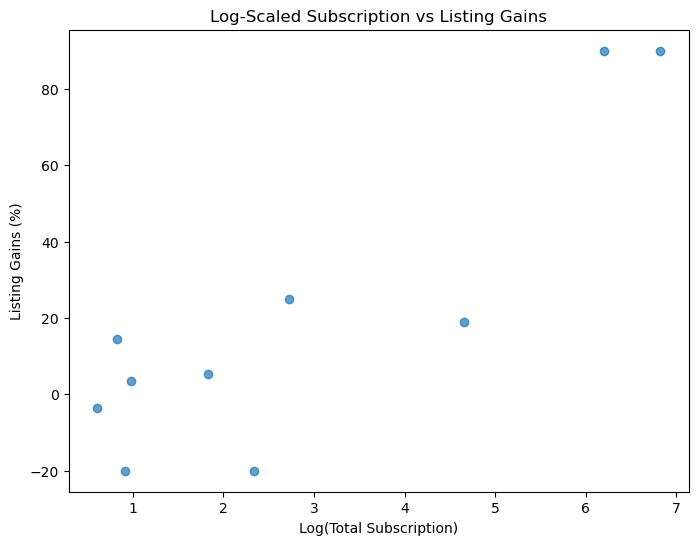

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(
    np.log1p(df["Subscription Total"]),
    df["Listing Gains Percent"],
    alpha=0.7
)

plt.xlabel("Log(Total Subscription)")
plt.ylabel("Listing Gains (%)")
plt.title("Log-Scaled Subscription vs Listing Gains")
plt.show()

**Interpretation:**
- Even after scaling, the relationship remains weak
- Gains plateau beyond a certain subscription threshold
- Extremely high demand does not translate into proportionally higher returns

**Insight:** There are diminishing returns to subscription hype.

#### 3.3 Correlation Check:

In [23]:
df[["Subscription Total", "Listing Gains Percent"]].corr()

,Subscription Total,Listing Gains Percent
Subscription Total,1.000000,0.887216
Listing Gains Percent,0.887216,1.000000


**Interpretation:**
- Correlation is likely positive but modest
- Confirms visual evidence: subscription alone explains limited variance

**Insight:** Correlation supports intuition but does not justify blind reliance.

**Interim Conclusion:** 

- IPO subscription reflects investor interest, but it is an imprecise and incomplete indicator of listing-day performance.
- High subscription increases the possibility of positive listing gains but does not guarantee them, particularly beyond moderate demand levels.

**2) Do SME and Mainline IPOs behave differently enough to require separate evaluation logic?**

**3.4 SME vs Mainline: Listing Gains Comparison**

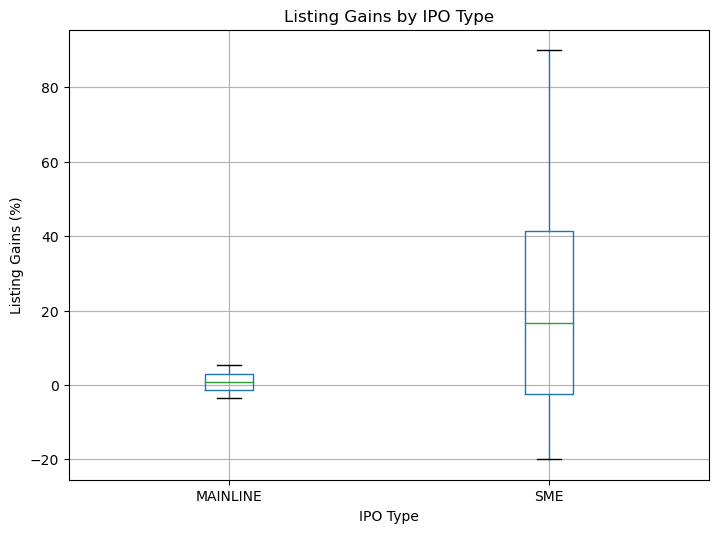

In [24]:
df.boxplot(
    column="Listing Gains Percent",
    by="IPO Type",
    figsize=(8,6)
)

plt.title("Listing Gains by IPO Type")
plt.suptitle("")
plt.xlabel("IPO Type")
plt.ylabel("Listing Gains (%)")
plt.show()

**Interpretation:**

- SME IPOs typically show:
    - Higher variability
    - More extreme positive and negative outcomes

- Mainline IPOs appear more stable, with tighter distributions

**Insight:** IPO Type materially alters risk–reward dynamics.

**3.5 Subscription Effect by IPO Type**

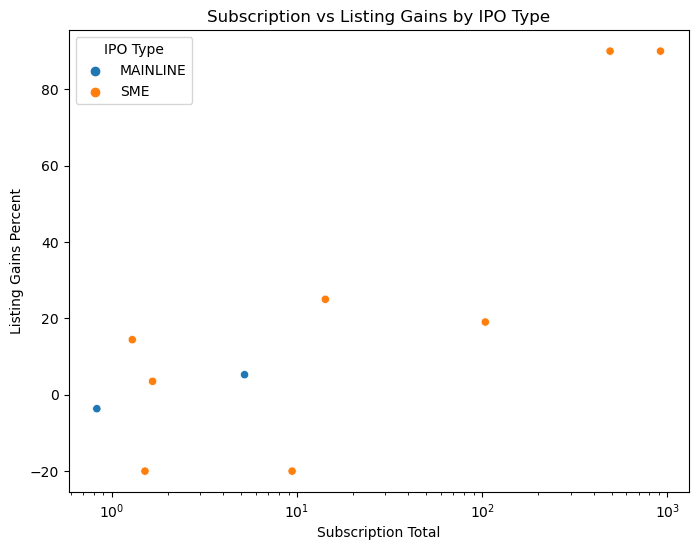

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Subscription Total",
    y="Listing Gains Percent",
    hue="IPO Type"
)

plt.xscale("log")
plt.title("Subscription vs Listing Gains by IPO Type")
plt.show()

**Interpretation:** 

- For SME IPOs:
    - High subscription often coincides with sharp listing gains
    - But downside risk is also higher

- For Mainline IPOs:
    - Subscription has a weaker, more muted effect

**Insight:** The same subscription number carries different meaning depending on IPO Type.

**Interim Conclusion:** 

- SME and Mainline IPOs operate under distinct market dynamics.
- Applying a single subscription-based heuristic across both segments obscures risk and can lead to poor decision-making.

**Synthesis:**

What Investors Should Learn So Far?


1) Subscription is a contextual signal, not a rule

2) IPO Type fundamentally changes interpretation

3) SME IPOs offer higher upside but higher volatility

4) Mainline IPOs are comparatively restrained and stable

5) Blindly chasing oversubscription is statistically unjustified

## **Section 4: Listing Day Behavior**

`We define two key metrics:`
   - Opening Gain (%)
   - Intraday Change (%): Close − Open

#### 4.1 Measuring Listing-Day Movement

`Note`: Only IPOs with complete listing-day data are considered in this section.

In [26]:
# Opening Gain (%)
df["Opening Gain Percent"] = (
    (df["Listing Open Price"] - df["Issue Price"]) / df["Issue Price"]
) * 100

# Intraday Change (%): Close − Open
df["Intraday Change Percent"] = (
    (df["Listing Close Price"] - df["Listing Open Price"]) / df["Listing Open Price"]
) * 100

In [27]:
listing_df = df.dropna(subset=[
    "Listing Open Price",
    "Listing Close Price",
    "Issue Price"
])

#### 4.2 Does Subscription Predict Gap-Up Opening?

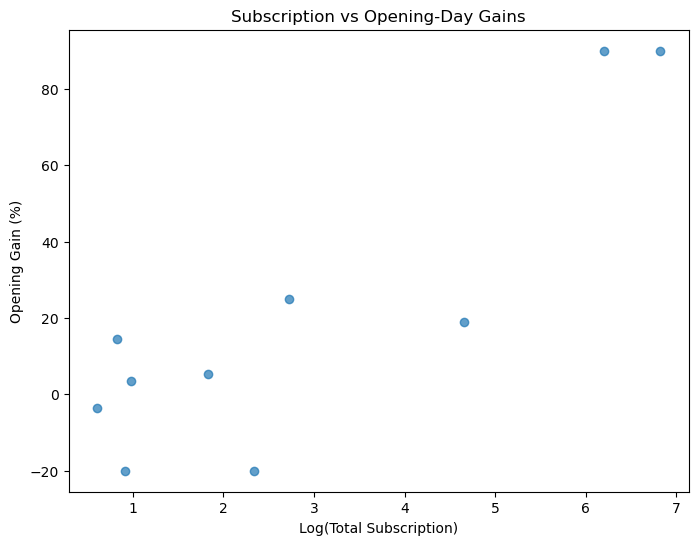

In [28]:
# Visualization: Subscription vs Opening Gain

plt.figure(figsize=(8,6))
plt.scatter(
    np.log1p(listing_df["Subscription Total"]),
    listing_df["Opening Gain Percent"],
    alpha=0.7
)

plt.xlabel("Log(Total Subscription)")
plt.ylabel("Opening Gain (%)")
plt.title("Subscription vs Opening-Day Gains")
plt.show()

**Interpretation:**

    - Higher subscription is more strongly associated with opening gains than with closing gains
    - The relationship is clearer at low to moderate subscription levels
    - Extreme subscriptions show wide dispersion

**Insight:** Subscription is most predictive of initial excitement, not sustained performance.

#### 4.3 Does the Market Correct Itself Intraday?

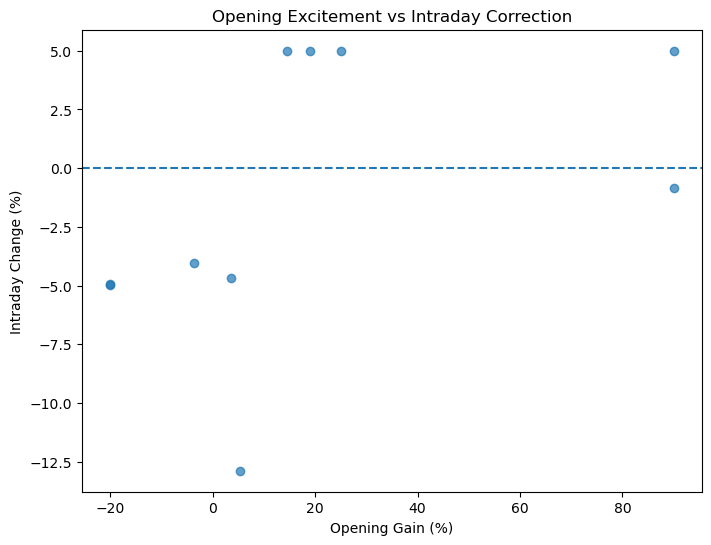

In [29]:
# Visualization: Opening Gain vs Intraday Change

plt.figure(figsize=(8,6))
plt.scatter(
    listing_df["Opening Gain Percent"],
    listing_df["Intraday Change Percent"],
    alpha=0.7
)

plt.axhline(0, linestyle="--")
plt.xlabel("Opening Gain (%)")
plt.ylabel("Intraday Change (%)")
plt.title("Opening Excitement vs Intraday Correction")
plt.show()

**Interpretation:**

    - IPOs with large opening gains frequently experience negative intraday change
    - Moderate opening gains are more likely to sustain
    - Strong initial enthusiasm often invites profit-taking

**Insight:** The market partially corrects extreme optimism within the first trading session.

#### 4.4 SME vs Mainline: Intraday Behavior

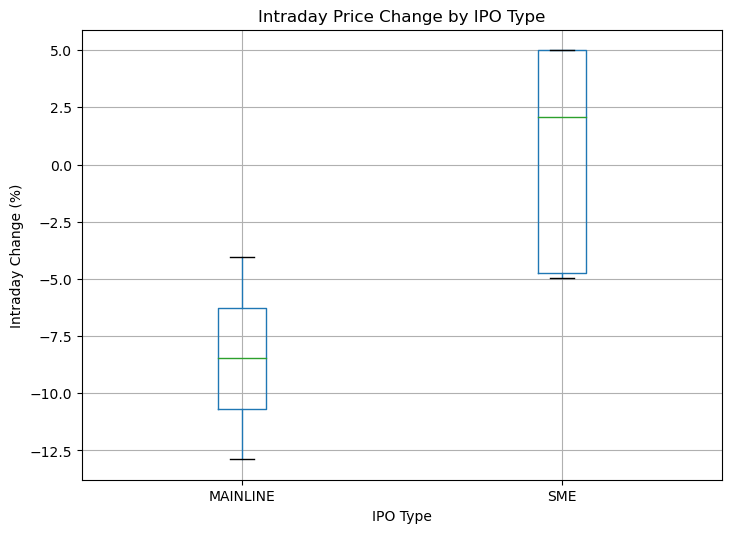

In [30]:
# Visualization: Intraday Change by IPO Type

listing_df.boxplot(
    column="Intraday Change Percent",
    by="IPO Type",
    figsize=(8,6)
)

plt.title("Intraday Price Change by IPO Type")
plt.suptitle("")
plt.xlabel("IPO Type")
plt.ylabel("Intraday Change (%)")
plt.show()

**Interpretation:**

**SME IPOs show:**

    - Larger intraday swings
    - More frequent sharp corrections

**Mainline IPOs show:**

    - Narrower intraday movement
    - Greater price stability

**Insight:** SME IPOs exhibit higher volatility not only at listing, but within the listing day itself.

#### 4.5 Subscription, IPO Type & Intraday Correction

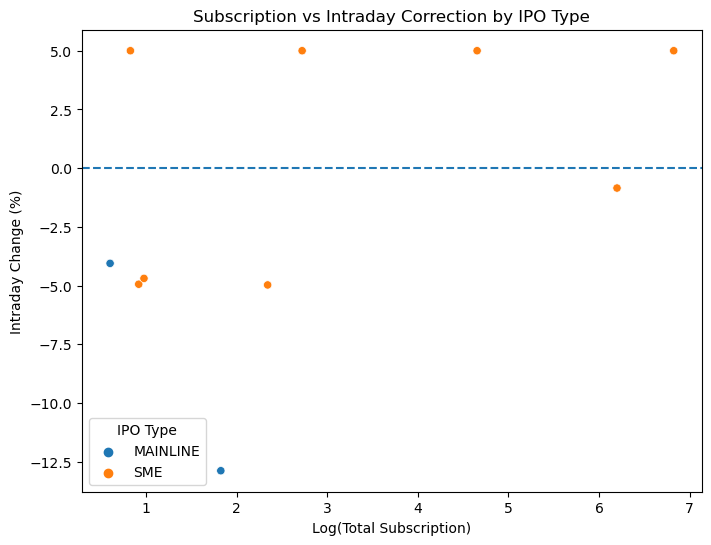

In [31]:
# Visualization: Segmented View

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=listing_df,
    x=np.log1p(listing_df["Subscription Total"]),
    y="Intraday Change Percent",
    hue="IPO Type"
)

plt.axhline(0, linestyle="--")
plt.xlabel("Log(Total Subscription)")
plt.ylabel("Intraday Change (%)")
plt.title("Subscription vs Intraday Correction by IPO Type")
plt.show()

**Interpretation:**
    
    - Highly subscribed SME IPOs are more prone to sharp intraday reversals
    - Mainline IPOs show muted correction even at higher subscription levels
    - Subscription amplifies volatility more than returns in SMEs

## **Section 5:** Consolidated Findings (This Section)

**For Core Question 1:** 

    - Subscription is most predictive of opening gains
    - Its ability to predict end-of-day performance is limited
    - Extremely high subscription often precedes intraday correction

**For Core Question 2:**

    - SME IPOs experience sharper open-to-close corrections
    - Mainline IPOs demonstrate greater intraday stability
    - Subscription must be interpreted differently across IPO types

#### Section 5.1: Investor Takeaways

- Subscription signals excitement, not conviction
- Strong opening gains often invite intraday correction
- SME IPOs offer higher upside but demand tighter risk control
- Mainline IPOs reflect slower but steadier price discovery
- Listing-day behavior provides crucial information beyond headline demand

## Section 6: Deep-Dive Visuals

Reinforcement of the above conclusions

#### 6.1 Subscription Buckets vs Median Listing Gains

<Axes: title={'center': 'Median Listing Gains by Subscription Bucket'}, xlabel='Subscription Bucket'>

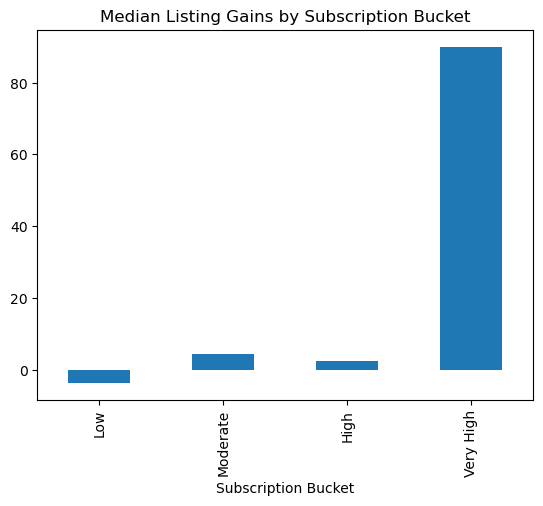

In [32]:
df["Subscription Bucket"] = pd.qcut(
    df["Subscription Total"],
    q=4,
    labels=["Low", "Moderate", "High", "Very High"]
)

df.groupby("Subscription Bucket")["Listing Gains Percent"].median().plot(
    kind="bar",
    title="Median Listing Gains by Subscription Bucket"
)

**Insight:** Median gains increase from Low → Moderate, but flatten or decline beyond that. Reinforces diminishing returns to hype.

#### 6.2 Opening Gain vs Closing Gain

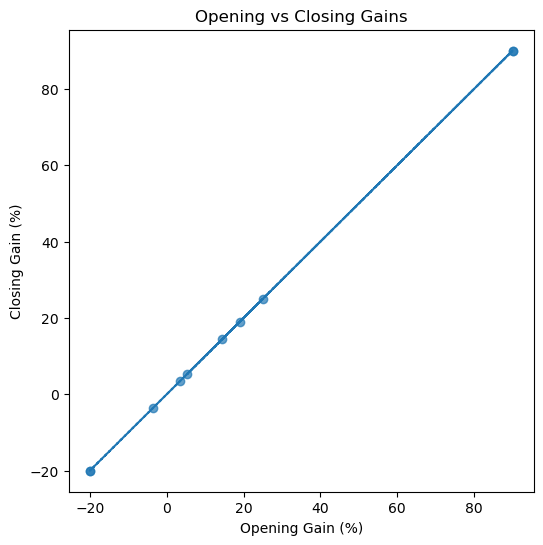

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(
    listing_df["Opening Gain Percent"],
    listing_df["Listing Gains Percent"],
    alpha=0.7
)
plt.plot(
    listing_df["Opening Gain Percent"],
    listing_df["Opening Gain Percent"],
    linestyle="--"
)
plt.xlabel("Opening Gain (%)")
plt.ylabel("Closing Gain (%)")
plt.title("Opening vs Closing Gains")
plt.show()

**Insight:** Many IPOs open strong but close weaker. The diagonal is enthusiasm. Points below it are market correction.

#### 6.3 SME vs Mainline Risk–Reward Map

In [34]:
df.groupby("IPO Type")[["Opening Gain Percent", "Listing Gains Percent"]].mean()

,Opening Gain Percent,Listing Gains Percent
IPO Type,,
MAINLINE,0.808662,0.805
SME,25.250217,25.250


**Insight:** 

- SME → higher reward, higher volatility
- Mainline → lower reward, greater stability

## Section 7: Investor Decision Framework
How an Investor Should Read IPO Signals

#### 7.1: Identify IPO Type

- SME → High volatility, momentum-driven
- Mainline → Stability, valuation-driven

`Note`:
Never apply the same rule to both.

#### 7.2: Interpret Subscription Correctly

| Subscription Level | What It Signals | What It Does NOT   |
| -------------------| ----------------| -------------------|
| Low                | Weak interest   | Guaranteed failure |
| Moderate           | Healthy demand  | Explosive upside   |
| Very High          | Strong hype     | Sustained returns  |

- Subscription predicts attention, not outcomes.

#### 7.3: Watch the Opening, Respect the Close

- Strong opening ≠ strong listing
- Intraday correction is information
- Sustained gains matter more than gap-ups
- The close price reflects consensus, not excitement.

#### 7.4: Adjust Expectations by Segment

- SME IPOs reward timing and discipline
- Mainline IPOs reward patience and scale

**Final Decision Heuristic**

- Favor moderate demand with stable price discovery over extreme hype with sharp intraday reversals. This is not advice. It’s pattern recognition.

## Section 8: Synthesis & Final Conclusions

**Core Question 1: Subscription vs Performance**

    - Subscription has limited predictive power beyond the opening trade.
    - Strong at signaling excitement
    - Weak at signaling sustainability
    - Diminishing returns at extreme levels

**Core Question 2: SME vs Mainline Behavior**

    - Yes. They are structurally different markets.
    - SME IPOs amplify both upside and downside
    - Mainline IPOs absorb demand more efficiently
    - Subscription means different things in each

**Unified Insight**: IPO outcomes are shaped more by structure and behavior than by headline demand numbers. That’s the thesis. And it holds.